## FAKE NEWS CLASSIFIER WITH MACHINE LEARNING ALGORITHMS USING Natural Language Processing- PART 1

kaggle dataset:- https://www.kaggle.com/c/fake-news/overview

### load data from kaggle competations without downloading it.

In [30]:
!pip install kaggle

In [31]:
! mkdir ~/.kaggle  #Make a directory named “.kaggle”

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [32]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json 
              # Now, you need to copy the “kaggle.json” file from the mounted google drive to the current instance 
              #storage. \The Google drive is mounted under the “./content/drive/MyDrive”  path. Just run the copy command as used in Linux:

In [33]:
! chmod 600 ~/.kaggle/kaggle.json

In [34]:
! kaggle competitions download -c fake-news

  0% 0.00/40.6k [00:00<?, ?B/s]
100% 40.6k/40.6k [00:00<00:00, 41.6MB/s]
 53% 5.00M/9.42M [00:00<00:00, 45.6MB/s]
100% 9.42M/9.42M [00:00<00:00, 59.2MB/s]
 65% 24.0M/37.0M [00:00<00:00, 49.4MB/s]
100% 37.0M/37.0M [00:00<00:00, 123MB/s] 


In [35]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [36]:
!unzip /content/test.csv.zip

Archive:  /content/test.csv.zip
  inflating: test.csv                


### Importing necessary libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import  CountVectorizer, TfidfVectorizer ,HashingVectorizer

%matplotlib inline

In [38]:
df = pd.read_csv(r"/content/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


### Removing rows which are having blank columns 

In [41]:
df = df.dropna()
df.shape

(18285, 5)

In [42]:
messages = df.copy() # here we are just resetting the indexes because of dropna 2000 rows are removed so.
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Preprocessing text data

In [45]:
import re
from nltk.corpus import  stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-Z]', " ", messages['title'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word  in stopwords.words('english')]
  review = " ".join(review)
  corpus.append(review)

In [46]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

### Applying Count Vectorizer 

In [47]:

# creating the bag of words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3) ) #1,3 che relational pairs banavat aahe ithe. means it will take 1 word then 2 word then 3 words like
X = cv.fit_transform(corpus).toarray()

In [48]:
X.shape

(18285, 5000)

In [49]:
y = messages['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

### Divide the dataset into train and test split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [52]:
print("Total features created are:- ",len(cv.get_feature_names())) 
cv.get_feature_names()[:20]

Total features created are:-  5000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [53]:
cv.get_params() 

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [54]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names()) #this means in NLP model get trained just like multiclass classification/regression problem.
count_df.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### defining the function to plot graphs

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Passive Aggressive Classifier Algorithm
this algorithm works well with text data 

In [56]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.916
Confusion matrix, without normalization


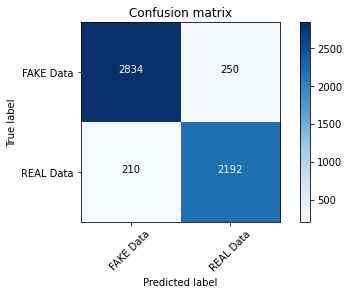

In [59]:
import itertools
from sklearn import metrics
linear_clf.fit(X_train, y_train) 
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter tuning 

In [63]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1)   

In [64]:
# here we will take values from 0 to 1 in step of 0.1
score = 0
for i in np.arange(0,1.1,0.1): #1.1 for to use last value as 1
  #print(i)
  classifier = MultinomialNB(alpha=i)
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  new_score = metrics.accuracy_score(y_test, pred)
  if new_score > score:
    score = new_score
  print(f"score for {i} alpha is {new_score}.")

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


score for 0.0 alpha is 0.8904484141450966.
score for 0.1 alpha is 0.9030258840685381.
score for 0.2 alpha is 0.9030258840685381.
score for 0.30000000000000004 alpha is 0.9026613197229311.
score for 0.4 alpha is 0.9019321910317171.
score for 0.5 alpha is 0.9024790375501276.
score for 0.6000000000000001 alpha is 0.9028436018957346.
score for 0.7000000000000001 alpha is 0.9035727305869486.
score for 0.8 alpha is 0.9030258840685381.
score for 0.9 alpha is 0.9032081662413416.
score for 1.0 alpha is 0.9017499088589136.


In [65]:
score

0.9035727305869486

accuracy:   0.903573
Confusion matrix, without normalization


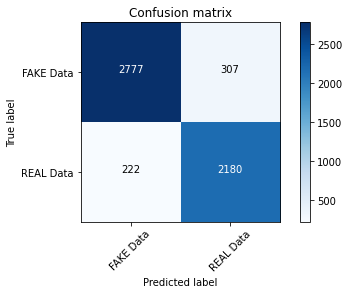

In [66]:
# so we will use alpha as 0.7 to get better results
classifier = MultinomialNB(alpha=0.7)
classifier.fit(X_train, y_train) 
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [67]:
# Get Features names
feature_names = cv.get_feature_names() # this are 5000 words

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
classifier.coef_[0] # this is array for all 5000 values. how much they are +ve or -ve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -9.15801631,  -8.66435849,  -9.15801631, ..., -11.06225376,
        -8.80347129,  -9.397246  ])

In [69]:
# Most real top 20 words
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20] # here we have combined words with their accuracy and sorted it

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-3.970155163867722, 'trump'),
 (-4.261924624696237, 'hillari'),
 (-4.353472208477426, 'clinton'),
 (-4.865809636229464, 'elect'),
 (-5.123210967319484, 'new'),
 (-5.217881532375815, 'comment'),
 (-5.25154057854044, 'video'),
 (-5.379160023426341, 'war'),
 (-5.379160023426341, 'us'),
 (-5.379160023426341, 'hillari clinton'),
 (-5.413782670527481, 'fbi'),
 (-5.428995945683222, 'vote'),
 (-5.514290026295739, 'email'),
 (-5.5715466478450715, 'world'),
 (-5.607543335708163, 'obama'),
 (-5.696945528659669, 'donald'),
 (-5.730916186447814, 'donald trump'),
 (-5.744834295602462, 'russia'),
 (-5.848094705483171, 'day'),
 (-5.848094705483171, 'america')]

In [70]:
# Most fake 20 words
sorted(zip(classifier.coef_[0], feature_names))[:20] 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-11.062253764023986, 'abe'),
 (-11.062253764023986, 'abroad'),
 (-11.062253764023986, 'abus new'),
 (-11.062253764023986, 'abus new york'),
 (-11.062253764023986, 'act new'),
 (-11.062253764023986, 'act new york'),
 (-11.062253764023986, 'advic'),
 (-11.062253764023986, 'advis new'),
 (-11.062253764023986, 'advis new york'),
 (-11.062253764023986, 'age new'),
 (-11.062253764023986, 'age new york'),
 (-11.062253764023986, 'agenda breitbart'),
 (-11.062253764023986, 'ail'),
 (-11.062253764023986, 'aleppo new'),
 (-11.062253764023986, 'aleppo new york'),
 (-11.062253764023986, 'ali'),
 (-11.062253764023986, 'america breitbart'),
 (-11.062253764023986, 'america new york'),
 (-11.062253764023986, 'american breitbart'),
 (-11.062253764023986, 'american new')]